# Text Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
hashtags_df = pd.read_csv("data/3.csv")
hash_list = hashtags_df["HashTags"].tolist()
title_list = hashtags_df["Course"].tolist()

vectorizer = TfidfVectorizer(stop_words='english')
hash_matrix = vectorizer.fit_transform(hash_list)
print("Feature names Identified :", vectorizer.get_feature_names())

Feature names Identified : ['advanced', 'automation', 'bigdata', 'datascience', 'design', 'developer', 'gcp', 'graphics', 'hadoop', 'ide', 'intermediate', 'java', 'jdbc', 'kubernetes', 'machinelearning', 'patterns', 'programming', 'python', 'scala', 'scripting']


In [3]:
kmeans = KMeans(n_clusters=3).fit(hash_matrix)
clusters = kmeans.labels_

for group in set(clusters):
    print("\nGroup : ",group, "\n-----------")
    for i in hashtags_df.index:
        if (clusters[i] == group):
            print(title_list[i])


Group :  0 
-----------
Apache Spark Essential Training
Machine Learning and AI Foundations
Hadoop for Data Science
Data Science on Google Cloud Platform
Scala for Data Science

Group :  1 
-----------
Java Memory Management
Java: Database Integration and JDBC
R Programming
Java IDE Overview
Kubernetes for Java Developers

Group :  2 
-----------
Python Automation and Testing
Python for Graphics
Python Design Patterns
Python Scripting


Sum of squared distances :  [11.433022387031059, 9.055813116540266, 6.7610661721912155, 5.825459420623091, 4.817093184201766, 3.877655335798854, 3.610276561928377, 2.818626006623061, 2.289111342035165, 1.8566372630984507, 1.3271225985105546, 0.8457910455266846, 0.40164181287464107, 2.220446049250313e-16]


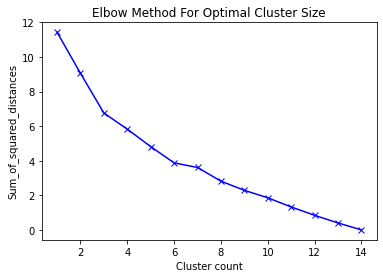

In [4]:
s = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(hash_matrix)
    s.append(km.inertia_)
    
print("Sum of squared distances : ", s)
plt.plot(K, s, 'bx-')
plt.xlabel('Cluster count')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal Cluster Size')
plt.show()